# EDA of Different Categories

Based on feedback from the customer, this notebook explores ten of the most frequently ordered items...




![alt text](https://drive.google.com/uc?id=1cGVKwDHUPFI5U8ys1U3QSmOrpXZvEKjK)



# Setup-Imports

In [0]:
#Colab stuffs:

#get a fast operator system
!nvidia-smi

#mount google drive
from google.colab import drive
drive.mount('/content/drive')#click on the link it provides and copy and paste that code into the authorization area

#access the OS system to work with current directories:
import os 

Tue Oct 15 17:17:31 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.40       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8    31W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
#imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
plt.style.use('fivethirtyeight')
sns.set_style("whitegrid")
sns.despine()
sns.set(rc={'figure.figsize':(15,9)})
%matplotlib inline

In [0]:
#Import the cleaned up data frame from the "clean up report"

#df = pd.read_csv('drive/My Drive/Capstone_2/data/df_clean.csv', low_memory=False)
# df = pd.read_csv('drive/My Drive/Capstone_2/data/one_year.csv', low_memory=False)
# df = pd.read_csv('drive/My Drive/Capstone_2/data/two_year.csv', low_memory=False)
#df = pd.read_csv('drive/My Drive/Capstone_2/data/df_2018.csv', low_memory=False)

df = pd.read_csv('drive/My Drive/Capstone_2/data/single_items.csv', index_col= 'invdate', parse_dates= True,)#individual items to test models
#df2 = pd.read_csv('drive/My Drive/Capstone_2/data/correct_cat_pivot.csv', index_col= 'invdate', parse_dates= True, low_memory=False)#categories to test models


In [0]:
#filling in the missing days for both dfs
idx = pd.date_range('2018-08-24', '2019-08-23')
df = df.reindex(idx, fill_value=0)

In [0]:
#seeing how many unique label groups there are once the first word was separated out in the description column
df.head()

,almond milk,arugula,broccoli,"cabbage,green",cucumber,garlic_peeled_5lb,jalapeno,jicama,leeks_20lb,mint,rainbowcarrot,red_bagged_beets_25lb
2018-08-24,0.0,20.0,10.0,0,1,7.0,5.0,8.0,1.0,36.0,3,3.0
2018-08-25,0.0,20.0,1.0,0,0,2.0,0.0,0.0,1.0,24.0,1,2.0
2018-08-26,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0
2018-08-27,0.0,22.0,6.0,0,7,7.0,8.0,7.0,2.0,36.0,1,5.0
2018-08-28,4.0,19.0,4.0,0,4,6.0,2.0,3.0,1.0,25.0,26,3.0


# Overview of the Different Categories

Text(0.5, 1.0, 'Count Plot of the Items')

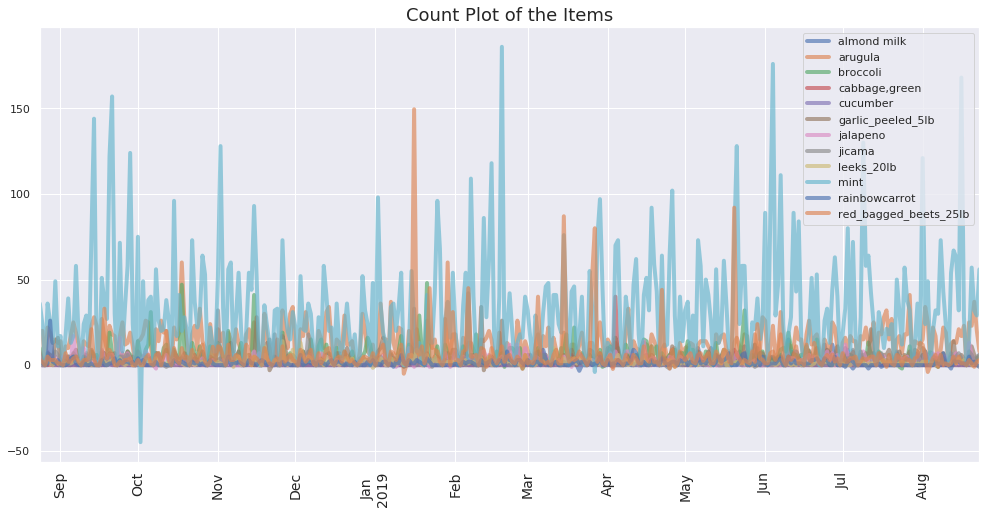

In [0]:
#Large view of different cateogories

df.plot(figsize=(15,8), linewidth= 4, alpha= .65)
plt.xticks(rotation =90, fontsize= 14)
plt.legend()
plt.title('Count Plot of the Items', fontsize= 18)

### Based on this plot I went back and combined meat & GObox into specialty and bread into dry_goods because 
#these separate categories were too insignificant compared to the other data points


 Yearly Timeseries of Different Food Items:



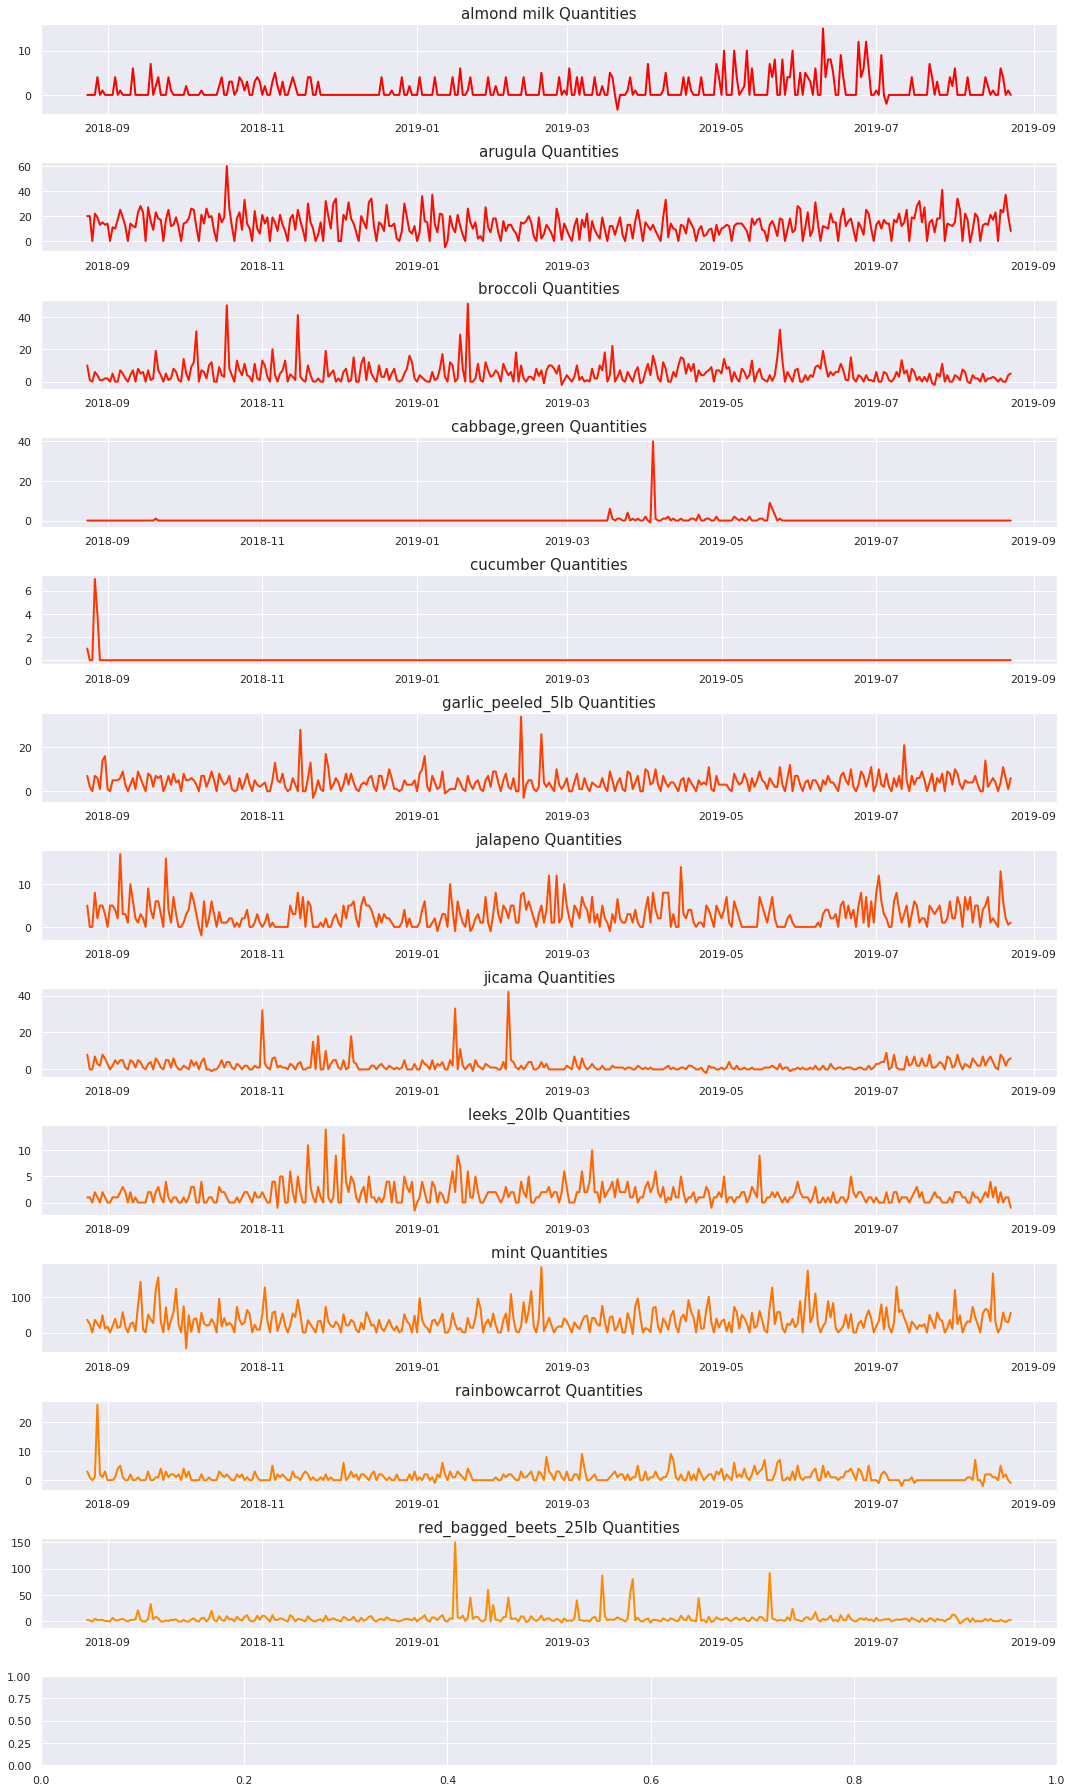

In [0]:
#visualizing categories
import matplotlib as mpl
print('\n Yearly Timeseries of Different Food Items:\n')

fig, axs = plt.subplots(13, figsize=(15,25))
cmap = mpl.cm.autumn
nsteps = 20
for num, col in enumerate (df.columns):
  axs[num].plot(df.index, df[col], linewidth= 2, label= col , color=cmap(num / float(nsteps)))
  axs[num].set_title (f"{col} Quantities", fontsize= 15)
  
plt.tight_layout()

#### Insights:


*   Interesting! The Strawberries are following the seasonality of the fruits category, but really everything has it's own unique pattern. 
* I'm really thinking I need to get away from the categories all the together, and just start modelling individual items. 
* Would it help them to know about strawberries in general verus all the different quantities of strawberries? hmmm...




# Taking a closer look at Weekly, Monthly, and day of the week seasonalities

In [0]:
#Create features for analysis
 
df['month'] = df.index.month 
df['week'] = df.index.week 
df['day'] = df.index.day_name()
df.head()

,almond milk,arugula,broccoli,"cabbage,green",cucumber,garlic_peeled_5lb,jalapeno,jicama,leeks_20lb,mint,rainbowcarrot,red_bagged_beets_25lb,month,week,day
2018-08-24,0.0,20.0,10.0,0,1,7.0,5.0,8.0,1.0,36.0,3,3.0,8,34,Friday
2018-08-25,0.0,20.0,1.0,0,0,2.0,0.0,0.0,1.0,24.0,1,2.0,8,34,Saturday
2018-08-26,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,8,34,Sunday
2018-08-27,0.0,22.0,6.0,0,7,7.0,8.0,7.0,2.0,36.0,1,5.0,8,35,Monday
2018-08-28,4.0,19.0,4.0,0,4,6.0,2.0,3.0,1.0,25.0,26,3.0,8,35,Tuesday


In [0]:
df.columns

Index(['almond milk', 'arugula', 'broccoli', 'cabbage,green', 'cucumber',
       'garlic_peeled_5lb', 'jalapeno', 'jicama', 'leeks_20lb', 'mint',
       'rainbowcarrot', 'red_bagged_beets_25lb', 'month', 'week', 'day'],
      dtype='object')

In [0]:
#re-index the dataset
dfw = df.groupby('week').sum()
dfw.head()

,almond milk,arugula,broccoli,"cabbage,green",cucumber,garlic_peeled_5lb,jalapeno,jicama,leeks_20lb,mint,rainbowcarrot,red_bagged_beets_25lb,month
week,,,,,,,,,,,,,
1,4.0,86.00,9.58,0,0,41.0,11.0,13.0,5.44,214.0,8,33.0,18
2,4.0,95.17,37.00,0,0,22.0,9.0,14.0,10.50,178.0,11,39.0,7
3,10.0,76.00,61.00,0,0,14.0,23.0,53.0,27.00,113.0,11,186.5,7
4,5.0,72.00,62.00,0,0,21.0,10.0,12.0,15.00,274.0,6,76.0,7
5,6.0,88.00,38.00,0,0,36.0,22.0,8.0,10.00,154.0,1,101.0,10


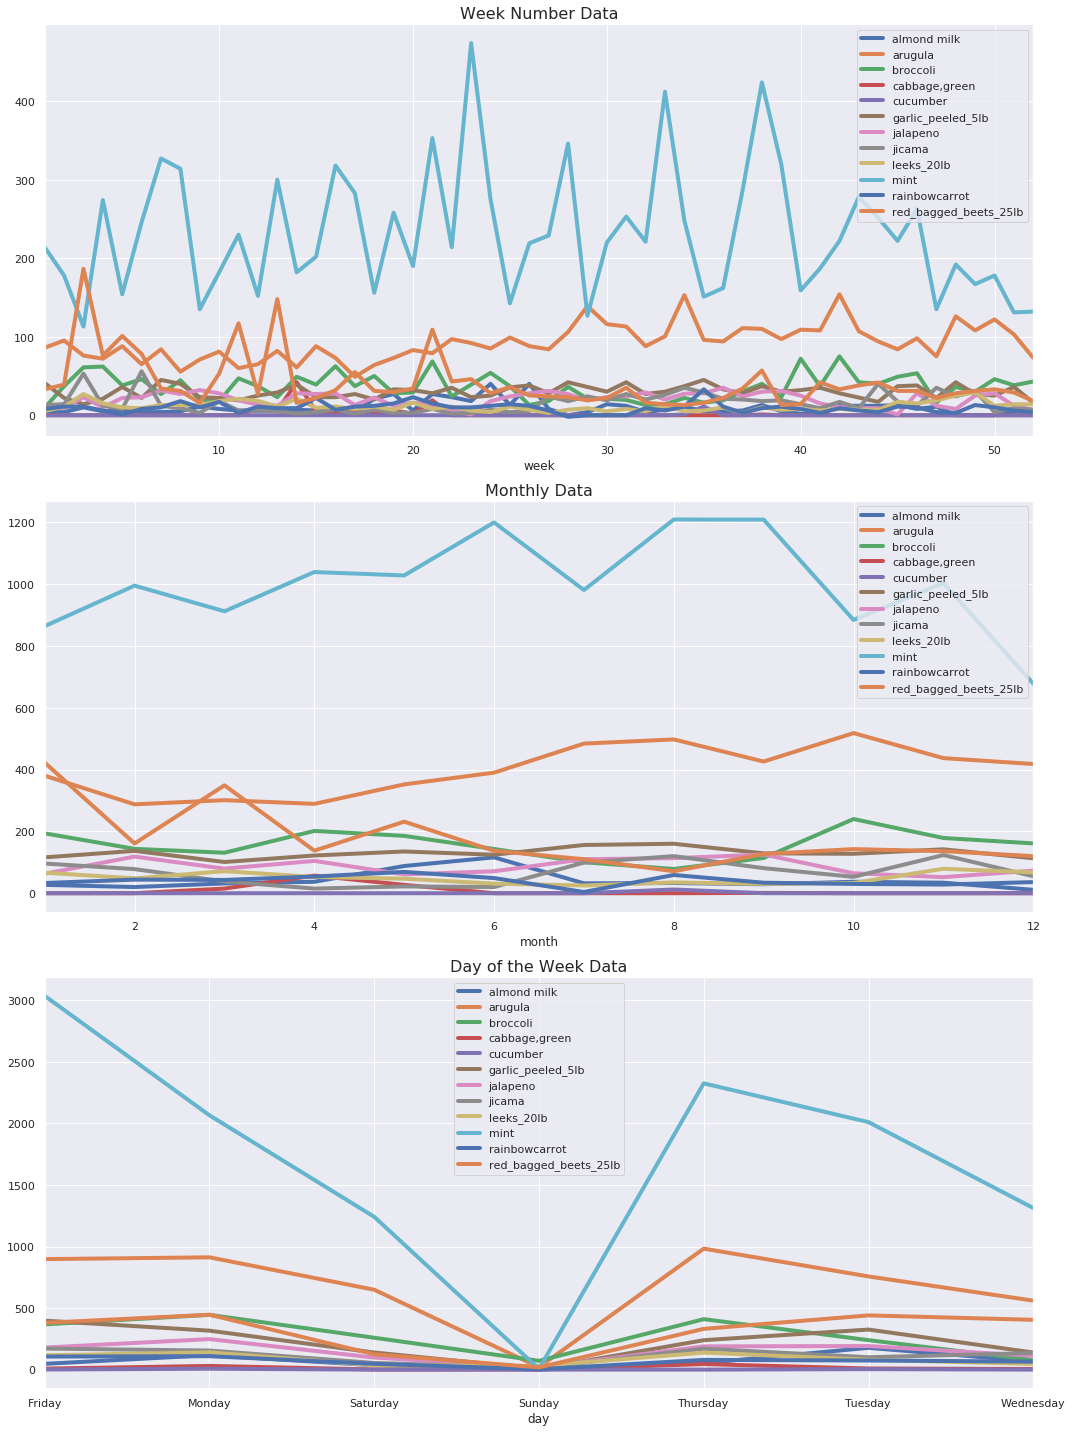

In [0]:
#re-index the dataset
cat= ['almond milk', 'arugula', 'broccoli', 'cabbage,green', 'cucumber',
       'garlic_peeled_5lb', 'jalapeno', 'jicama', 'leeks_20lb', 'mint',
       'rainbowcarrot', 'red_bagged_beets_25lb']
dfw = df.groupby('week').sum()
dfm = df.groupby('month').sum()
dfd = df.groupby('day').sum()


fig, axes = plt.subplots(nrows=3, ncols=1)

#plotting
dfw[cat].plot(figsize=(15,20), linewidth = 4, ax=axes[0])
axes[0].title.set_text('Week Number Data')
axes[0].title.set_fontsize(16)
axes[0].legend(loc="upper right")

dfm[cat].plot(figsize=(15,20), linewidth = 4, ax=axes[1])
axes[1].title.set_text('Monthly Data')
axes[1].title.set_fontsize(16)

dfd[cat].plot(figsize=(15,20), linewidth = 4, ax=axes[2])
axes[2].title.set_text('Day of the Week Data')
axes[2].title.set_fontsize(16)

plt.legend()
plt.tight_layout()

#### Insights




# Visualizing the outliers under each category:

How many outliers are there in each category? How many of those nasty outliers are there??? We will utilize box charts to visualize this.


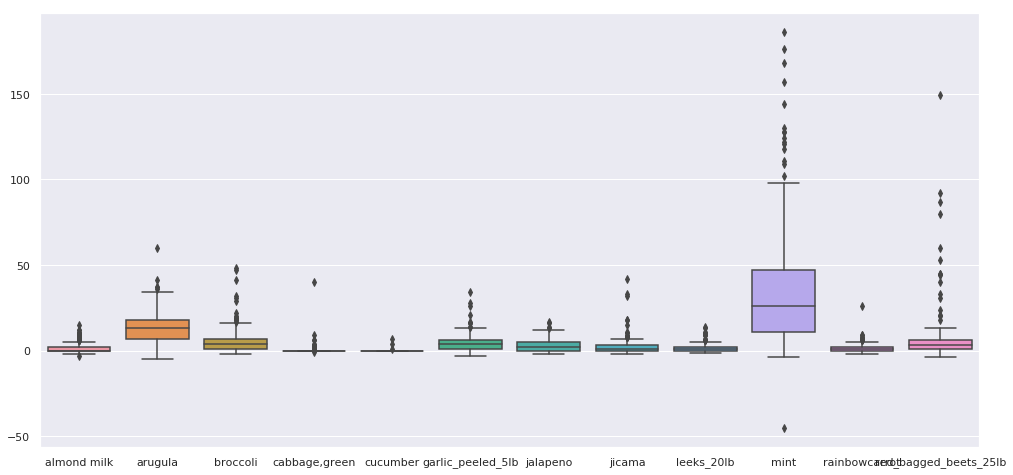

In [0]:
# Draw Plot
fig, axes = plt.subplots(figsize=(15,8))
sns.boxplot(data=df[cat])

#### Insights


*   Lots and lots of outliwers on the product level. I was kind of expecting this, but now I must figure out how to deal with them.




# Takeaways:


1.   On the individual level, the products have a LOT of outliers, and a lot of different seasonality and patterns happening.
2. All the worst performing items in the prophet model were the items with severe outliers and super low demand-- these are the ones where SES and SMA did better.
3. I will try coercing the outliers and adding monthly seasonality to help the prophet model.

